In [1]:
!nvidia-smi

Thu Aug 17 08:30:18 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pwd

/content


In [4]:
import os
ROOT = "/content/drive/MyDrive/Colab Notebooks/ANN implementation Regression"
os.chdir(ROOT)

In [5]:
!pwd

/content/drive/MyDrive/Colab Notebooks/ANN implementation Regression


In [6]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
housing = fetch_california_housing()

In [9]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [10]:
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [11]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [12]:
X = pd.DataFrame(housing.data,columns = housing.feature_names)

In [13]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
y = pd.DataFrame(housing.target,columns = ["target"])

In [15]:
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [16]:
X.shape

(20640, 8)

In [17]:
y.shape

(20640, 1)

In [18]:
X.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [19]:
X_train_full, X_test,y_train_full,y_test = train_test_split(X, y ,random_state = 42)

In [20]:
X_train_full.shape

(15480, 8)

In [21]:
X_test.shape

(5160, 8)

In [22]:
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full, y_train_full,random_state =42)

In [23]:
print(X_train_full.shape,X_test.shape,X_train.shape,X_valid.shape)

(15480, 8) (5160, 8) (11610, 8) (3870, 8)


In [27]:
X_train.shape[1]

8

In [28]:
LAYERS = [
    tf.keras.layers.Dense(30,activation = "relu", input_shape = X_train.shape[1:]),
    tf.keras.layers.Dense(10,activation = "relu"),
    tf.keras.layers.Dense(5,activation = "relu"),
    tf.keras.layers.Dense(1)
]

In [29]:
model = tf.keras.models.Sequential(LAYERS)

In [36]:
## For calculating accuracy score (r2 score)
# from keras import backend as K

def coeff_determination(y_true,y_pred):
  from keras import backend as K
  SS_res = K.sum(K.square(y_true-y_pred))
  SS_total = K.sum(K.square(y_true - K.mean(y_true)))
  return (1 - SS_res/(SS_total + K.epsilon()))


In [41]:
LOSS ="mse"
OPTIMIZER = "sgd"

model.compile(optimizer = OPTIMIZER, loss = LOSS, metrics = [coeff_determination])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [43]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [47]:
EPOCHS = 10

history = model.fit(X_train,y_train,epochs = EPOCHS, validation_data = [X_valid,y_valid])

Epoch 1/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3471 - coeff_determination: 0.7247 - val_loss: 0.3257 - val_coeff_determination: 0.7332
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3431 - coeff_determination: 0.7277 - val_loss: 0.3383 - val_coeff_determination: 0.7195
Epoch 3/10
363/363 [==============================] - 2s 5ms/step - loss: 0.3397 - coeff_determination: 0.7300 - val_loss: 0.3229 - val_coeff_determination: 0.7357
Epoch 4/10
363/363 [==============================] - 2s 5ms/step - loss: 0.3364 - coeff_determination: 0.7322 - val_loss: 0.3334 - val_coeff_determination: 0.7213
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3323 - coeff_determination: 0.7337 - val_loss: 0.3091 - val_coeff_determination: 0.7456
Epoch 6/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3298 - coeff_determination: 0.7387 - val_loss: 0.3157 - val_coeff_determination: 0.7391
Epoch 7/10
363/3

In [48]:
pd.DataFrame(history.history)

,loss,coeff_determination,val_loss,val_coeff_determination
0,0.347147,0.724705,0.325658,0.733179
1,0.343108,0.727687,0.338284,0.719465
2,0.339697,0.730023,0.322858,0.735718
3,0.336432,0.732198,0.333369,0.721283
4,0.332268,0.733722,0.309050,0.745648
5,0.329827,0.738739,0.315699,0.739074
6,0.327141,0.737015,0.354560,0.702731
7,0.326369,0.740552,0.308759,0.747290
8,0.320576,0.743781,0.308779,0.747094
9,0.319868,0.744497,0.307974,0.746618


<Axes: >

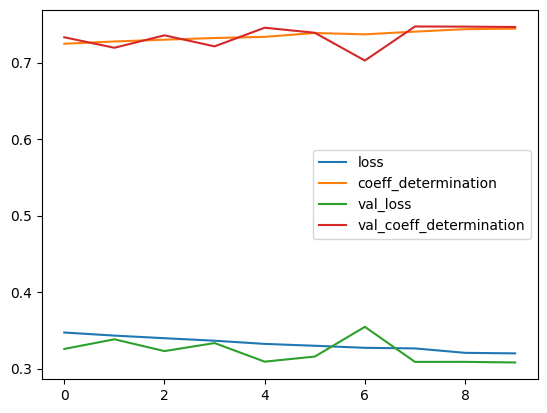

In [49]:
pd.DataFrame(history.history).plot()

In [50]:
model.evaluate(X_test,y_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.3198 - coeff_determination: 0.7396


[0.31984320282936096, 0.7396367788314819]

In [51]:
new = X_test[0]

In [52]:
new

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735,  0.19374821,  0.2870474 ])

In [53]:
new.shape

(8,)

In [56]:
new = new.reshape((1,8))

In [57]:
new.shape

(1, 8)

In [58]:
model.predict(new)

1/1 [==============================] - 0s 288ms/step


array([[0.71150535]], dtype=float32)

In [59]:
y_test

,target
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000
...,...
5363,5.00001
19755,0.63200
4885,1.17700
13043,2.63100
